# Affine Transformations and Iterated Function Systems

This homework is on some of the material in section 6.2.  As always, go through this document, read the text, and __execute all the code cells__ as you get to them.  When instructed, do your homework in the provided code cells.

## Affine transformations

We have already experimented several times with using matrices to encode geometric transformations of points and other objects in the plane $\mathbb{R}^2$.  One thing that all the transformations we explored so far had in common was that they were all done by _multiplying points (vectors) in the plane by a matrix_. That means they all were _linear transformations_.  One consequence was that all of the transformations we studied _mapped the origin on the origin_, since the image of the zero vector under a linear transformation is always a zero vector.

That means we were somewhat limited in what transformations we can use: we could do scaling, scaling by a different factor in $x$ and $y$ direction, shear, reflection over a subspace, rotation around the origin, and projection to a subspace.  Some of the things we could not do were _shifting_ (a.k.a. _translation_) and _rotation around an arbitrary point_.

In order to be able to include these geometric transformations, we need to extend the set of vector transformations we use to so called __affine transformations__.
An _affine transformation_ is simply a linear transformation followed by a shift. In order to describe an affine transformation, we need a square matrix $A$ that will represent the linear transformation, and a vector $\mathbf{b}$ that will represent the shift.  So an affine transformation can be written as

$$T\mathbf{x} = A\mathbf{x} + \mathbf{b}$$

### An example

Let's look at the effect of the transformation given by 

$$T\mathbf{x} = \begin{bmatrix}2 & 1\\-1 &1\end{bmatrix}\mathbf{x} + \begin{bmatrix}1\\2\end{bmatrix}$$

To be able to see the effect, we will want  to plot it.  In the past we used the JSXGraph package for plotting out transformation, however, that package is not powerful and fast enough to be used in the second part of this homework.  We will use a much more powerful `PyPlot` package.  To load the package and set it up, we do

In [1]:
using PyPlot
ion() #turn on the "interactive" mode so the plots will actually display

Now we will define the function that will do the transformation:

In [2]:
function T(x)
    return [2 1; -1 1]*x + [1;2]
end

T (generic function with 1 method)

In [3]:
T([1,2])

2-element Array{Int64,1}:
 5
 3

We see that the affine transformation $T$ maps the point $(1,2)$ to the point $(5,3)$. When we studied linear transformations in the plane, we usually 
transformed whole bunch of points at once simply by writing the points as columns of a matrix and multiplying this matrix by the transformation matrix. 

That will not work here.  Trying to apply an affine transformation to a matrix will cause an error.  The matrix multiplication will work fine, but the vector addition will not, since we will by trying to add matrices with different number of columns, which is impossible.  Luckily there is a way around this: the `mapslices` function lets us apply a function on all columns (or all rows) of a matrix. (We will see below that there is a better way to do this.)

----

In [4]:
?mapslices

search: 

```
mapslices(f, A, dims)
```

Transform the given dimensions of array `A` using function `f`. `f` is called on each slice of `A` of the form `A[...,:,...,:,...]`. `dims` is an integer vector specifying where the colons go in this expression. The results are concatenated along the remaining dimensions. For example, if `dims` is `[1,2]` and `A` is 4-dimensional, `f` is called on `A[:,:,i,j]` for all `i` and `j`.


mapslices



----
We want to iterate over the columns, which means that the first dimension, the number of row, is going to be unspecified and replaced by a colon.

To apply the transformation $T$ on the points $(1,2)$, $(2,1)$ and $(3,4)$, we apply `mapslices` to the matrix

$$\begin{bmatrix} 1 & 2 & 3\\ 2 & 1 & 4\end{bmatrix}$$

In [5]:
mapslices(T, [1 2; 2 1; 3 4]', 1)

2x3 Array{Int64,2}:
 5  6  11
 3  1   3

### Transforming a square

In the previous homework on transformations in the plane, we always transformed the square given by the points $(0,0)$, $(1,0)$, $(1,1)$ and $(0,1)$, so we will do the same now:

In [6]:
square = [0 0; 1 0; 1 1; 0 1]'

2x4 Array{Int64,2}:
 0  1  1  0
 0  0  1  1

The transformed image of the square will be:

In [7]:
transformed = mapslices(T, square, 1)

2x4 Array{Int64,2}:
 1  3  4  2
 2  1  2  3

To plot polygons, we will use the `fill` method of `PyPlot`.  It takes arguments in multiples of three: first is the $x$-coordinates of the polygon vertices, then the $y$-coordinates, then a string describing plotting style.  If you need to plot more than one polygon, you provide three more arguments: $x$-coordinates of the second polygon, $y$-coordinates of the second polygon, the style of the second polygon, _e.t.c._ 

We will plot the square in red, denoted by `"r"`, and the transformed shape in blue, `"b"`.  

To extract the $x$ and $y$-coordinates, we need to extract the first row (`square[1,:]`) and the second row (`square[2,:]`).

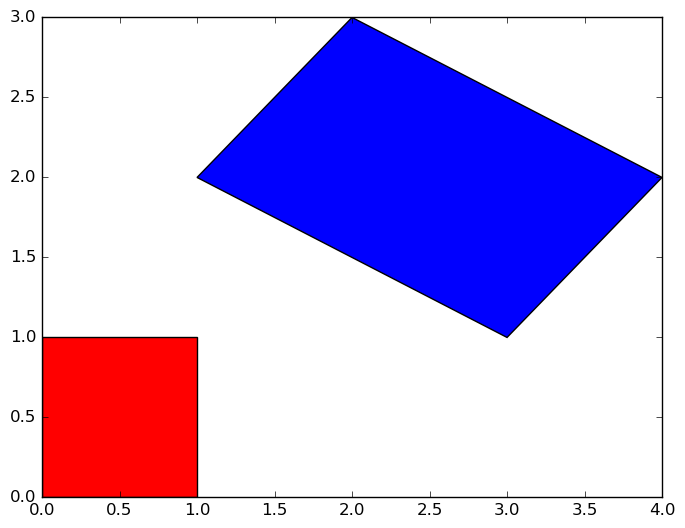

2-element Array{Any,1}:
 PyObject <matplotlib.patches.Polygon object at 0x7fe2ab5a3190>
 PyObject <matplotlib.patches.Polygon object at 0x7fe2acffde90>

In [8]:
fill(square[1,:]', square[2,:]', "r", transformed[1,:]', transformed[2,:]', "b")

You can see that the transformed polygon does not have the origin as one of its corners.

## Homogeneous coordinates

We saw that applying an affine transformation to a large number of points is somewhat cumbersome, since we had to iterate over the column of the point matrix
using `mapslices`.  Linear transformations are much easier, all you have to do is just a matrix multiplication. 

There is actually a way to do affine transformations by simple matrix multiplication.  One has to introduce so called _homogeneous coordinates_. The idea is to represent points by vectors in $\mathbb{R}^3$ instead of $\mathbb{R}^2$, with the third component __always being 1__.  For example the point $(3,4)$ would be represented by 

$$\begin{bmatrix}3\\4\\1\end{bmatrix}$$

An affine transformation 

$$T\mathbf{x} = A\mathbf{x} + \mathbf{b}$$

will then be represented by the matrix

$$\begin{bmatrix} a_{11} & a_{12} & b_1 \\ a_{21} & a_{22} & b_2 \\ 0 & 0 & 1\end{bmatrix}$$

The set of all affine coordinates of points in the plane does not form a vector space, and the origin is not actually represented by the zero vector, and so affine transformation can be represented by matrix multiplication even though they do not always map the origin to the origin.

As an example, let's look at the affine transformation we were looking at above:

$$T\mathbf{x} = \begin{bmatrix}2 & 1\\-1 &1\end{bmatrix}\mathbf{x} + \begin{bmatrix}1\\2\end{bmatrix}$$

This will be represented by the matrix

$$\begin{bmatrix}2 & 1 & 1\\ -1 & 1 & 2\\ 0 & 0 & 1\end{bmatrix}$$

In [9]:
A = [2 1 1; -1 1 2; 0 0 1]

3x3 Array{Int64,2}:
  2  1  1
 -1  1  2
  0  0  1

The points $(1,2)$, $(2,1)$ and $(3,4)$ will be, in _homogeneous coordinates_, represented by the matrix

$$\begin{bmatrix} 1 & 2 & 3\\ 2 & 1 & 4\\1 & 1 & 1\end{bmatrix}$$

In [10]:
points = vcat([1 2; 2 1; 3 4]', [1 1 1])

3x3 Array{Int64,2}:
 1  2  3
 2  1  4
 1  1  1

The affine transformation will simply be a matrix multiplication:

In [11]:
A*points

3x3 Array{Int64,2}:
 5  6  11
 3  1   3
 1  1   1

Ignoring the third row, we see that these are the same three points as we have obtained earlier.

We will now regenerate the plot we made above, this time using homogeneous coordinates and matrix multiplication:

In [12]:
square_h = vcat(square, fill(1,4)')

3x4 Array{Int64,2}:
 0  1  1  0
 0  0  1  1
 1  1  1  1

In [13]:
transformed_h = A*square_h

3x4 Array{Int64,2}:
 1  3  4  2
 2  1  2  3
 1  1  1  1

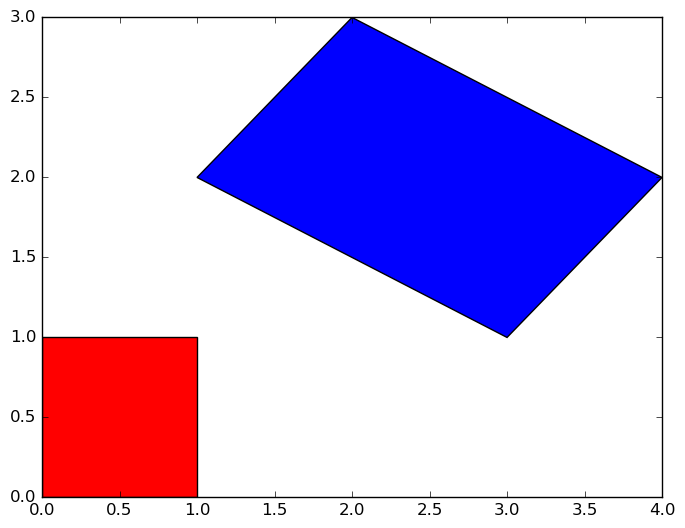

2-element Array{Any,1}:
 PyObject <matplotlib.patches.Polygon object at 0x7fe2acf51c90>
 PyObject <matplotlib.patches.Polygon object at 0x7fe2aad088d0>

In [14]:
fill(square_h[1,:]', square_h[2,:]', "r", transformed_h[1,:]', transformed_h[2,:]', "b")

## Homework part 1

Read the subsection "Transformations in computer graphics" on page 279 and the example on pages 280 and 281.  Then construct a matrix representation of the 
rotation by $30^\circ$ counterclockwise around the point $(1.2, 1.4)$.  Find the matrix by __first creating the three invidual transformation matrices__ (translation, rotation, and the second translation) __and multiplying the matrices in Julia__, rather than plugging numbers into the formula at the bottom of page 280.  Use the empy cell below to enter your code.  If you need more than one cell, pressing <Alt>-<Enter> instead of <Shift>-<Enter> will create additional cells for you.  For bonus points, transform a small triangle, and plot the original triangle and its transformed image on the same plot.

__Make sure all the code cells above this one are executed before you attempt your work!__

In [15]:
function example7(h,k,angle)
    rad = angle*(pi/180)
    return [1 0 h; 0 1 k; 0 0 1]*[cos(rad) -sin(rad) 0; sin(rad) cos(rad) 0; 0 0 1]*[1 0 -h;0 1 -k; 0 0 1]
end
## testing on given data on page 218
## example7(5,4,90) ## tested fine and gives me same output as the book.
println("The rotation matrix is: ")
rot_ex7 = example7(1.2,1.4,30)
rot_ex7


The rotation matrix is: 


3x3 Array{Float64,2}:
 0.866025  -0.5        0.86077 
 0.5        0.866025  -0.412436
 0.0        0.0        1.0     

## Iterated Function Systems

In the second part of the homework, you will use _affine transformations_ and _homogeneous coordinates_ to plot some iterated function systems, as described in the subsection "Fractal Pictures of Nature" on pages 281-283.  You can start by reading the subsection, if you have not done so already.

As an example, I will implement the iterated function system that is described in the book.  You will then use the framework that I set up to experiment with other iterated function systems.

Each iterated function system consists of several affine transformations.  Usually, each transformation also has a probability associated with it.  Sometimes there are no probabilities specified, which means that all the probabilities are equal. The process if generating the IFS plot is described on page 282.  It basically boils down to repeatedly randomly choosing one of the transformations according to the probabilities and applying it to the point that was the result of the previous step.

### Setup:

In the setup part, we will create a list of affine transformation matrices.  We will also need a way to randomly choose one of them with given probabilities.

#### Create the affine matrices

Since we will be dealing with whole bunch of affine transformations, it may be a good idea to automate the process of creation of affine matrices.  We will write a function that will receive a $2\times 2$ matrix and a vector from $\mathbb{R}^2$ and turn it into an affine transformation matrix by stacking them together and appending `[0 0 1]` as the third row:

In [16]:
function affine(A, b)
    return vcat(hcat(A, b), [0 0 1])
end

affine (generic function with 1 method)

Test it of the transformation that we used above:

In [17]:
affine([2 1; -1 1], [1,2])

3x3 Array{Int64,2}:
  2  1  1
 -1  1  2
  0  0  1

#### Generate random integers
We will also need a way to generate random integers with given probabilities.  An easy way to do this is to create a coroutine that produces the integers for us, and then just keep calling the coroutine when we need the integers.  The function will receive a list of probabilities, the first of which will be the prbability of 1, second will be the probability of 2, theird probability of 3, _e.t.c._  If $n$ probabilities are given and they add up to less than 1, the missing amount will be the probability of $n+1$.  If the probabilities add up to more than 1, the last few probabilities will be ignored.  There is also an optional argument `precision` with default value 2, which specify how many decimal places will the probabilities be rounded to:

In [18]:
function produce_ints(probs, precision=2)
    max = 10^precision;
    boundaries = vcat(cumsum(round(max*probs)), [max+1])
    while true
        n = rand(1:max)
        produce(findfirst(x -> x >= n, boundaries))
    end
end

produce_ints (generic function with 2 methods)

_Side note:_ If you are curious about the "2 methods" that the function `produce_ints` seems to have, we can look at the methods this way:

In [19]:
methods(produce_ints)

# 2 methods for generic function "produce_ints":
produce_ints(probs) at In[18]:2
produce_ints(probs, precision) at In[18]:2

As we can see, the 2 methods are caused by the optional argument: there is one method for calling the function without the optinal argument, and one for calling it with the optional argument.  _End of side note._

To test our coroutine and to demonstrate how to use it, we will generate 10,000 integers 1 - 4 with given probabilities, and count how many of each were generated:

In [20]:
counts = fill(0, 4)
probs = [0.1, 0.4, 0.3, 0.2]

for (i, n) in enumerate(@task produce_ints(probs))
    counts[n] += 1
    if i == 10_000
        break
    end
end

for (n,p) in enumerate(counts)
    println("The integer $n was generated $(p/100)% of time.")
end

The integer 1 was generated 9.93% of time.
The integer 2 was generated 39.58% of time.
The integer 3 was generated 29.91% of time.
The integer 4 was generated 20.58% of time.


### The example

Now that we have a way to easily create affine matrices and to generate random integers with given probabilities, we can go ahead and do an example of an iterated function system.

First we will create a list of affine matrices, using the transformations listed on page 282:

In [21]:
Transforms = (
affine([.86 .03; -.03 .86], [0, 1.5]),
affine([.2 -.25; .21 .23], [0, 1.5]),
affine([-.15 .27; .25 .26], [0, .45]),
affine([0 0; 0 .17], [0,0]),
)

(
3x3 Array{Float64,2}:
  0.86  0.03  0.0
 -0.03  0.86  1.5
  0.0   0.0   1.0,

3x3 Array{Float64,2}:
 0.2   -0.25  0.0
 0.21   0.23  1.5
 0.0    0.0   1.0,

3x3 Array{Float64,2}:
 -0.15  0.27  0.0 
  0.25  0.26  0.45
  0.0   0.0   1.0 ,

3x3 Array{Float64,2}:
 0.0  0.0   0.0
 0.0  0.17  0.0
 0.0  0.0   1.0)

Then we will prepare the probabilities:

In [22]:
probs = [.83, .08, .08]

3-element Array{Float64,1}:
 0.83
 0.08
 0.08

Notice that I did not include the last one, since it will be filled in automatically, and it will prevent accidentally generating 5 with some very small but nonzero probability due to a rounding error.

We will generate 200,000 points:

In [23]:
number_of_points = 200_000

200000

Now we are ready to actually calculate the points of the iterated function system:

In [24]:
points = Array{Float64}(3, number_of_points)  # reserve space for the points

pt = [0,0,1] # homogeneous coordinates of the origin

for (i, n) in enumerate(@task produce_ints(probs))
    pt = Transforms[n]*pt
    points[:,i] = copy(pt)
    if i == number_of_points
        break
    end
end

points

3x200000 Array{Float64,2}:
 0.0  -0.375  -0.26715  -0.136811  -1.07042  …  0.739278  0.764146  0.811896
 1.5   1.845   3.09795   4.17225    2.43089     4.27891   5.15768   5.91268 
 1.0   1.0     1.0       1.0        1.0         1.0       1.0       1.0     

Now the variable `points` contains the homogeneous coordinates of 200,000 points that approximate the resulting fractal.  We will now plot the points.

<span style="color:red; font-size:150%">__Important:__ Make sure you transpose the $x$ and $y$ coordinates before plugging them into `plot`.  It expects the coordinates to be in a column matrix or a vector, and when it receives a large row matrix, it __hangs for ever and is really hard to kill!__</span>.  If you accidentally plug in a large row matrix to `plot` and it hangs, first try to interrupt the kernel using the little black square button on the toolbar, and if that does not work, go to the settings tab (the one with the wrench) and restart the project.  You may have to refrest the notebook afterwards.  That's what the `'` in the `xs = points[1,:]'` is for!

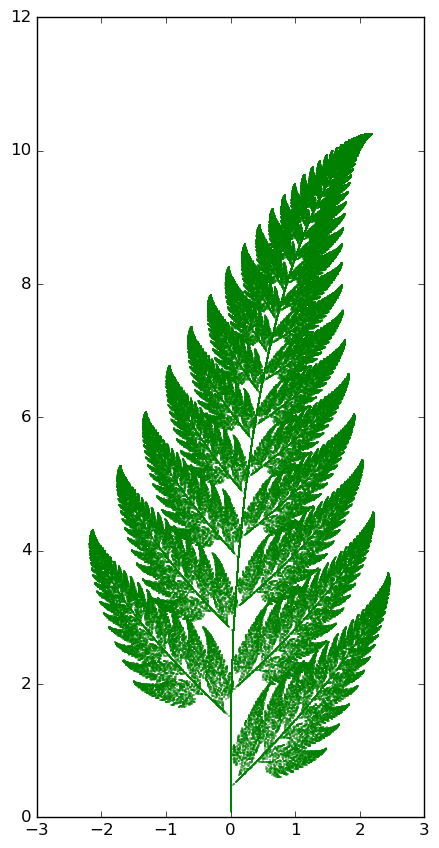

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe2aac71c10>

In [25]:
xs = points[1,:]' # extract x coordinate and TRANSPOSE THEM!!!!!!!!!!
ys = points[2,:]' # extract y coordinate and TRANSPOSE THEM!!!!!!!!!!

figure(figsize=(5, 10))
plot(xs, ys, "g.",  markersize=1)

## Homework part 2:

In the second part of this homework, you will experiment with iterated function systems, and produce another IFS plot, different from the one above.  You can tweak the parameters of the original system and see how the image reacts, you can study the theory of iterated function systems (you may want to search the _Collage  Theorem_) and design your own system from scratch, or you can find some recipes for iterated functions systems online (see for example the site http://ecademy.agnesscott.edu/~lriddle/ifs/ifs.htm).  You can use the functions defined above in your code, or you can create your own, it is up to you.  I will give bonus points for especially cool or original plots.

In [26]:
thettta = 113*(pi/180)
rrr = 0.69
Transforms2 = (
affine([rrr*cos(thettta) -rrr*sin(thettta); rrr*sin(thettta) rrr*cos(thettta)], [0, 1]),
affine([rrr*cos(thettta) rrr*sin(thettta); -rrr*sin(thettta) rrr*cos(thettta)], [0, 1]),
affine([1 0; 0 1], [0,0]),
)

(
3x3 Array{Float64,2}:
 -0.269604  -0.635148  0.0
  0.635148  -0.269604  1.0
  0.0        0.0       1.0,

3x3 Array{Float64,2}:
 -0.269604   0.635148  0.0
 -0.635148  -0.269604  1.0
  0.0        0.0       1.0,

3x3 Array{Int64,2}:
 1  0  0
 0  1  0
 0  0  1)

In [27]:
probs2 = [.6,.7,.8,.9]

4-element Array{Float64,1}:
 0.6
 0.7
 0.8
 0.9

In [28]:
number_of_points2 = 200000

200000

In [29]:
points2 = Array{Float64}(3, number_of_points2)  # reserve space for the points

pt2 = [0,0,1] # homogeneous coordinates of the origin

for (i, n) in enumerate(@task produce_ints(probs2))
    pt2 = Transforms2[n]*pt2
    points2[:,i] = copy(pt2)
    if i == number_of_points2
        break
    end
end

points2

3x200000 Array{Float64,2}:
 0.0  -0.635148  -0.292671  -0.174944  …  -0.831624  -0.494738  0.239212
 1.0   0.730396   0.399669   0.706358      1.13194    0.16662   1.26931 
 1.0   1.0        1.0        1.0           1.0        1.0       1.0     

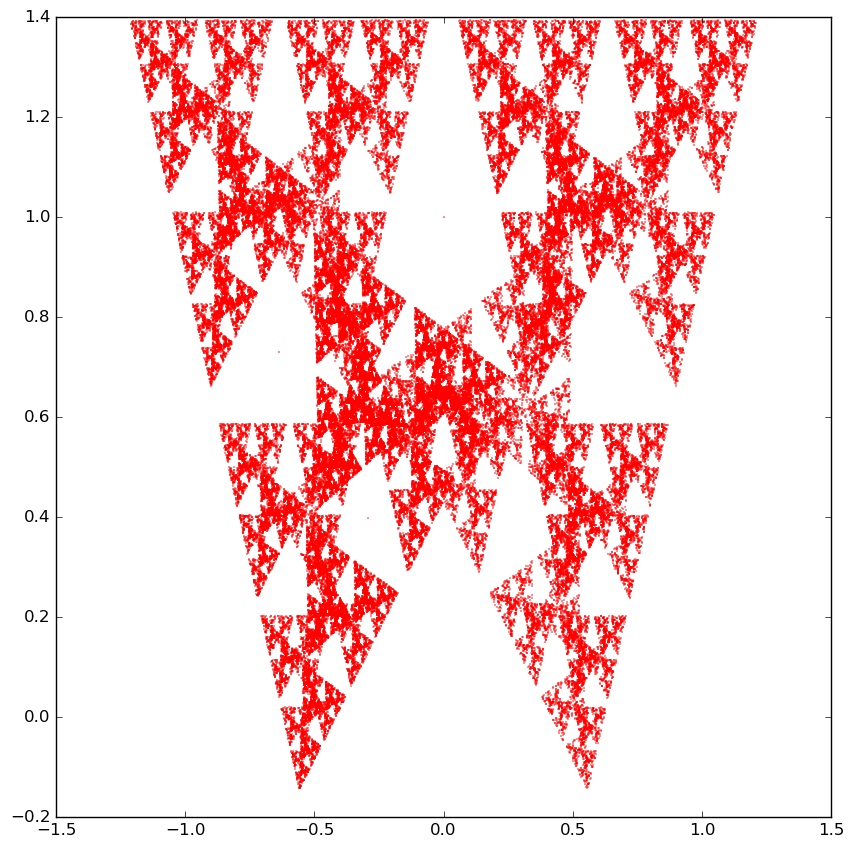

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe2a7fd8d90>

In [30]:
xs2 = points2[1,:]' # extract x coordinate and TRANSPOSE THEM!!!!!!!!!!
ys2 = points2[2,:]' # extract y coordinate and TRANSPOSE THEM!!!!!!!!!!

figure(figsize=(10, 10))
plot(xs2, ys2, "r.",  markersize=1)

<span style="color:green">Good job!</span>